### 选择的数据集
- Microsoft 资讯推荐:  https://learn.microsoft.com/zh-cn/azure/open-datasets/dataset-microsoft-news?tabs=azureml-opendatasets
- YELP: https://www.yelp.com/dataset/download

#### 1. 下载MIND数据集

In [1]:
import os
import tempfile
import shutil
import urllib
import zipfile
import pandas as pd

# Temporary folder for data we need during execution of this notebook (we'll clean up
# at the end, we promise)
temp_dir = os.path.join(tempfile.gettempdir(), 'mind')
os.makedirs(temp_dir, exist_ok=True)

# The dataset is split into training and validation set, each with a large and small version.
# The format of the four files are the same.
# For demonstration purpose, we will use small version validation set only.
base_url = 'https://mind201910small.blob.core.windows.net/release'
training_small_url = f'{base_url}/MINDsmall_train.zip'
validation_small_url = f'{base_url}/MINDsmall_dev.zip'
training_large_url = f'{base_url}/MINDlarge_train.zip'
validation_large_url = f'{base_url}/MINDlarge_dev.zip'

In [2]:
def download_url(url,
                 destination_filename=None,
                 progress_updater=None,
                 force_download=False,
                 verbose=True):
    """
    Download a URL to a temporary file
    """
    if not verbose:
        progress_updater = None
    # This is not intended to guarantee uniqueness, we just know it happens to guarantee
    # uniqueness for this application.
    if destination_filename is None:
        url_as_filename = url.replace('://', '_').replace('/', '_')
        destination_filename = \
            os.path.join(temp_dir,url_as_filename)
    if (not force_download) and (os.path.isfile(destination_filename)):
        if verbose:
            print('Bypassing download of already-downloaded file {}'.format(
                os.path.basename(url)))
        return destination_filename
    if verbose:
        print('Downloading file {} to {}'.format(os.path.basename(url),
                                                 destination_filename),
              end='')
    urllib.request.urlretrieve(url, destination_filename, progress_updater)
    assert (os.path.isfile(destination_filename))
    nBytes = os.path.getsize(destination_filename)
    if verbose:
        print('...done, {} bytes.'.format(nBytes))
    return destination_filename

In [3]:
zip_path = download_url(training_small_url, destination_filename="./MINDsmall_train.zip", verbose=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

os.listdir(temp_dir)

['behaviors.tsv', 'entity_embedding.vec', 'news.tsv', 'relation_embedding.vec']

#### 2. 使用pandas读取文件

In [4]:
behaviors_path = os.path.join(temp_dir, 'behaviors.tsv')
mind_data = pd.read_table(
    behaviors_path,
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'])

In [5]:
mind_data

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [6]:
mind_data['history'] = mind_data['history'].apply(lambda x: x.split() if isinstance(x, str) else [])
mind_data['impressions'] = mind_data['impressions'].apply(lambda x: [item.split('-') for item in x.split()] if isinstance(x, str) else [])

In [7]:
mind_data.head(10)

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[[N55689, 1], [N35729, 0]]"
1,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[[N20678, 0], [N39317, 0], [N58114, 0], [N2049..."
2,3,U73700,11/14/2019 7:01:48 AM,"[N10732, N25792, N7563, N21087, N41087, N5445,...","[[N50014, 0], [N23877, 0], [N35389, 0], [N4971..."
3,4,U34670,11/11/2019 5:28:05 AM,"[N45729, N2203, N871, N53880, N41375, N43142, ...","[[N35729, 0], [N33632, 0], [N49685, 1], [N2758..."
4,5,U8125,11/12/2019 4:11:21 PM,"[N10078, N56514, N14904, N33740]","[[N39985, 0], [N36050, 0], [N16096, 0], [N8400..."
5,6,U19739,11/11/2019 6:52:13 PM,"[N39074, N14343, N32607, N32320, N22007, N442,...","[[N21119, 1], [N53696, 0], [N33619, 1], [N2572..."
6,7,U8355,11/11/2019 12:22:09 PM,"[N8419, N15771, N1431, N5888, N18663, N24123, ...","[[N51346, 0], [N33848, 0], [N15132, 0], [N1068..."
7,8,U46596,11/12/2019 10:29:36 PM,"[N47438, N20950, N21317, N5469]","[[N7821, 0], [N24898, 0], [N12029, 0], [N13579..."
8,9,U79199,11/13/2019 10:13:02 AM,"[N37083, N459, N29499, N38118, N37378, N24691,...","[[N51048, 1], [N64094, 0], [N13907, 0], [N3901..."
9,10,U53231,11/11/2019 11:28:11 AM,"[N58936, N15919, N11917, N2153, N55312, N13008...","[[N53585, 1], [N55689, 0]]"


In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [12]:
te = TransactionEncoder()
transaction = te.fit(mind_data['history']).transform(mind_data['history'])
df = pd.DataFrame(transaction, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.055395,(N1150)
1,0.052534,(N16233)
2,0.077903,(N16715)
3,0.063645,(N18870)
4,0.054566,(N27448)
5,0.053458,(N28088)
6,0.083025,(N29177)
7,0.129545,(N306)
8,0.096932,(N31801)
9,0.056446,(N32004)


In [13]:
te = TransactionEncoder()
transaction = te.fit(mind_data['history']).transform(mind_data['history'])
df = pd.DataFrame(transaction, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.129545,(N306)
1,0.111770,(N42620)


In [15]:
te = TransactionEncoder()
transaction = te.fit(mind_data['history']).transform(mind_data['history'])
df = pd.DataFrame(transaction, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.045966,(N10059)
1,0.030829,(N10897)
2,0.035696,(N11005)
3,0.037085,(N11101)
4,0.034466,(N11231)
...,...,...
87,0.043379,(N64273)
88,0.034899,(N64467)
89,0.048208,(N8148)
90,0.043710,(N8448)


#### 3. 模式命名
用户倾向模式：可以分析用户经常点击哪些类型的的新闻，这种模式可以揭示用户的倾向

#### 4. 结果分析
在apriori算法中，minimum_support对选择的结果影响较大
当min_support = 0.03时，有92项满足要求
当min_support = 0.05时，有27项满足要求
当min_support = 0.1时，只有2项满足要求

       item  frequency
175    N306      20765
287  N42620      17918
8    N31801      15694
69   N47020      15216
3    N45794      15200
111  N43142      14565
108    N871      14210
0    N55189      13394
903  N29177      13243
218  N16715      13011


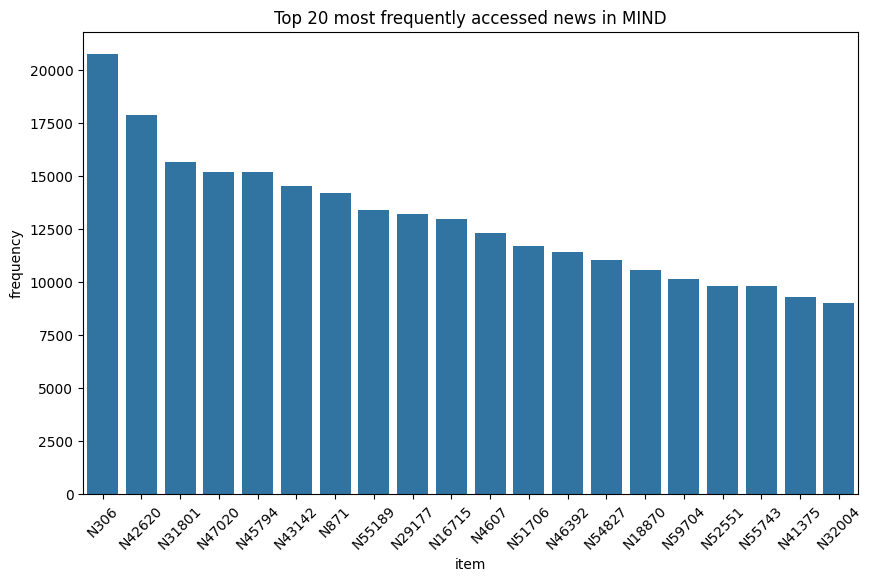

In [20]:
import collections
history = []
history.extend(h for his in mind_data['history'] for h in his)
frequency = collections.Counter(history)

freq_df = pd.DataFrame(list(frequency.items()), columns=['item', 'frequency'])
freq_df = freq_df.sort_values(by='frequency', ascending=False)

print(freq_df.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='item', y='frequency', data=freq_df.head(20))
plt.xticks(rotation=45)
plt.title('Top 20 most frequently accessed news in MIND')
plt.show()


下面对Yelp数据集进行处理

In [55]:
import numpy as np
import pandas as pd
import json

with open(r"D:\yelp_dataset\yelp_academic_dataset_business.json", encoding="utf8") as f:
    data = f.read()

json_data = []
data = data.split("\n")
for d in data:
    # print(d)
    jdata = json.loads(d)
    json_data.append(jdata)

df = pd.DataFrame(json_data)

df['categories'] = df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
df.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"[Doctors, Traditional Chinese Medicine, Naturo...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"[Shipping Centers, Local Services, Notaries, M...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Department Stores, Shopping, Fashion, Home & ...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","[Brewpubs, Breweries, Food]","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","[Burgers, Fast Food, Sandwiches, Food, Ice Cre...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","[Sporting Goods, Fashion, Shoe Stores, Shoppin...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"[Synagogues, Religious Organizations]","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","[Pubs, Restaurants, Italian, Bars, American (T...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","[Ice Cream & Frozen Yogurt, Fast Food, Burgers...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


In [56]:
te = TransactionEncoder()
transaction = te.fit(df['categories']).transform(df['categories'])
df = pd.DataFrame(transaction, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

frequent_itemsets.sort_values(by='support', ascending=False)

frequent_itemsets

,support,itemsets
0,0.051129,(Active Life)
1,0.054135,(American (Traditional))
2,0.071655,(Automotive)
3,0.073597,(Bars)
4,0.095061,(Beauty & Spas)
5,0.065815,(Event Planning & Services)
6,0.184780,(Food)
7,0.079084,(Health & Medical)
8,0.095486,(Home Services)
9,0.074482,(Local Services)


In [44]:
te = TransactionEncoder()
transaction = te.fit(df['categories']).transform(df['categories'])
df = pd.DataFrame(transaction, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_index(by='support', ascending=False)
frequent_itemsets

,support,itemsets
0,0.184780,(Food)
1,0.347651,(Restaurants)
2,0.162259,(Shopping)
3,0.102909,"(Restaurants, Food)"


#### 3. 模式命名
酒店标签模式：什么样的酒店标签能够吸引游客入住
#### 4. 数据分析
不难发现，对于游客来说，选择酒店最关键的点在于饮食和游玩。Food，Restaurants这两个分类出现的次数最多，排在他们之后的则是购物，均为消费性的分类。

#### 5. 可视化

             category  frequency
17        Restaurants      52268
18               Food      27781
12           Shopping      24395
135     Home Services      14356
107     Beauty & Spas      14292
38          Nightlife      12281
4    Health & Medical      11890
7      Local Services      11198
36               Bars      11065
50         Automotive      10773


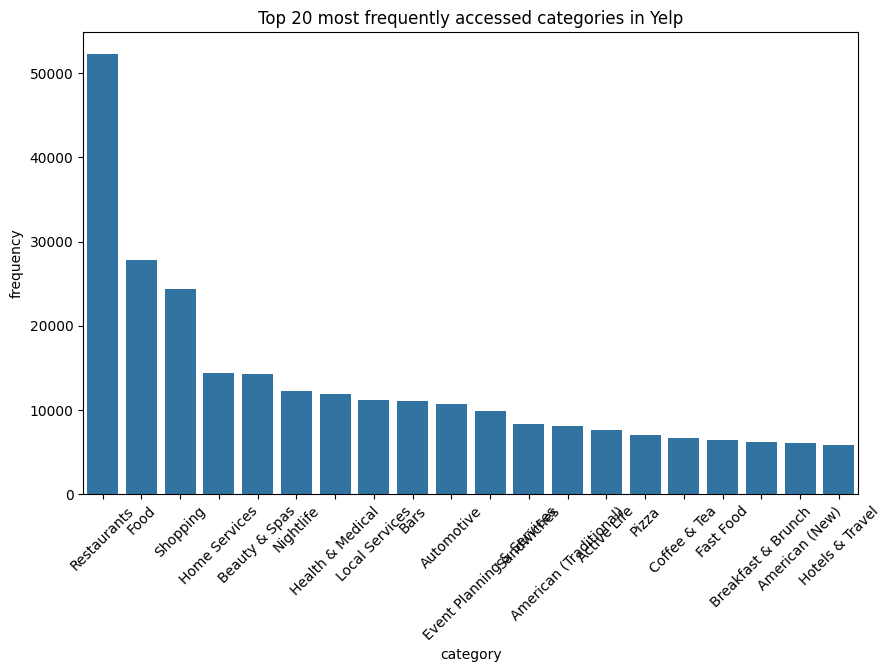

In [67]:
categories = [i["categories"] for i in json_data]
categories = [i.split(", ") for i in categories if i is not None]
cates = [i for j in categories for i in j]
cates_freq = collections.Counter(cates)
cates_freq = pd.DataFrame(list(cates_freq.items()), columns=['category', 'frequency'])
cates_freq = cates_freq.sort_values(by='frequency', ascending=False)
print(cates_freq.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='frequency', data=cates_freq.head(20))
plt.xticks(rotation=45)
plt.title('Top 20 most frequently accessed categories in Yelp')
plt.show()